In [1]:
#! pip install hmm-classifier

In [2]:
#!pip install hmmlearn


In [3]:
from hmmlearn import hmm
import numpy as np
#from hmm_classifier import HMM_classifier

In [4]:
import numpy as np


In [7]:
x = np.random.randint(0, 10, size=(300, 10, 4))
y = np.random.randint(0, 10, size=(300))

In [ ]:
# https://github.com/elmihailol/HMM-classifier


Sampling from and decoding an HMM
---------------------------------
This script shows how to sample points from a Hidden Markov Model (HMM):
we use a 4-state model with specified mean and covariance.
The plot show the sequence of observations generated with the transitions
between them. We can see that, as specified by our transition matrix,
there are no transition between component 1 and 3.
Then, we decode our model to recover the input parameters.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0, 0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

In [7]:
# Build an HMM instance and set parameters
gen_model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
gen_model.startprob_ = startprob
gen_model.transmat_ = transmat
gen_model.means_ = means
gen_model.covars_ = covars

In [8]:
# Generate samples
X, Z = gen_model.sample(500)

<ipython-input-19-03b838bf1323>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


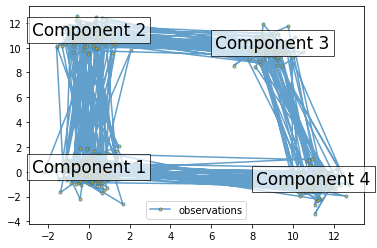

In [19]:
# Plot the sampled data
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
        mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    ax.text(m[0], m[1], 'Component %i' % (i + 1),
            size=17, horizontalalignment='center',
            bbox=dict(alpha=.7, facecolor='w'))
ax.legend(loc='best')
fig.show()

# %%

In [21]:
# Now, let's ensure we can recover our parameters.

scores = list()
models = list()
for n_components in (3, 4, 5):
    # define our hidden Markov model
    model = hmm.GaussianHMM(n_components=n_components,
                            covariance_type='full', n_iter=10)
    model.fit(X[:X.shape[0] // 2])  # 50/50 train/validate
    models.append(model)
    scores.append(model.score(X[X.shape[0] // 2:]))
    print(f'Converged: {model.monitor_.converged}'
          f'\tScore: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
      'states')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model


Converged: True	Score: -1068.69910722798
Converged: True	Score: -991.8473384621187
Converged: True	Score: -981.879935311091
The best model had a score of -981.879935311091 and 5 states


In [22]:
states = model.predict(X)

<ipython-input-24-009e10811b91>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-24-009e10811b91>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


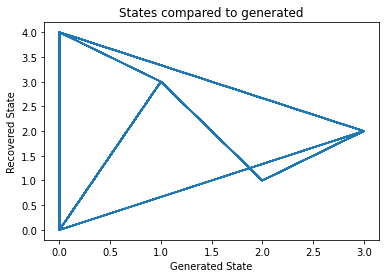

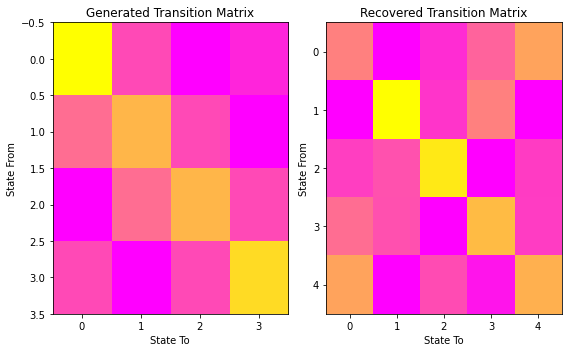

In [24]:
# %%
# Let's plot our states compared to those generated and our transition matrix
# to get a sense of our model. We can see that the recovered states follow
# the same path as the generated states, just with the identities of the
# states transposed (i.e. instead of following a square as in the first
# figure, the nodes are switch around but this does not change the basic
# pattern). The same is true for the transition matrix.

# plot model states over time
fig, ax = plt.subplots()
ax.plot(Z, states)
ax.set_title('States compared to generated')
ax.set_xlabel('Generated State')
ax.set_ylabel('Recovered State')
fig.show()

# plot the transition matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ax1.imshow(gen_model.transmat_, aspect='auto', cmap='spring')
ax1.set_title('Generated Transition Matrix')
ax2.imshow(model.transmat_, aspect='auto', cmap='spring')
ax2.set_title('Recovered Transition Matrix')
for ax in (ax1, ax2):
    ax.set_xlabel('State To')
    ax.set_ylabel('State From')

fig.tight_layout()
fig.show()

<ipython-input-25-e8b6aa48c84f>:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-25-e8b6aa48c84f>:73: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Model #0	Score: -26229.97162260086
Model #1	Score: -26390.227666980343
Model #2	Score: -26376.08494741456
Model #3	Score: -26281.17258583047
Model #4	Score: -26299.018510061796
Model #5	Score: -26236.137373940026
Model #6	Score: -26230.97470392611
Model #7	Score: -26261.19219260242
Model #8	Score: -26297.411183031392
Model #9	Score: -26253.65090619033
Model #10	Score: -26314.971591730027
Model #11	Score: -26330.637054900657
Model #12	Score: -26233.953794150075
Model #13	Score: -26410.827080381176
Model #14	Score: -26232.586361189577
Model #15	Score: -26234.54549170027
Model #16	Score: -26314.348834698347
Model #17	Score: -26293.540648513397
Model #18	Score: -26394.936525414483
Model #19	Score: -26283.727600048238
Model #20	Score: -26304.723449933692
Model #21	Score: -26342.915792746473
Model #22	Score: -26234.55956727752
Model #23	Score: -26278.85891661995
Model #24	Score: -26235.874751646974
Model #25	Score: -26269.369332609396
Model #26	Score: -26242.02291323223
Model #27	Score: -262

<ipython-input-25-e8b6aa48c84f>:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


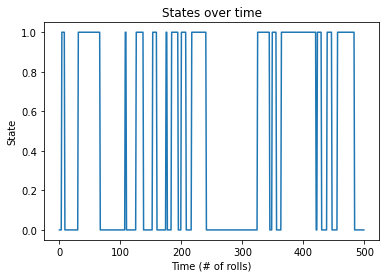

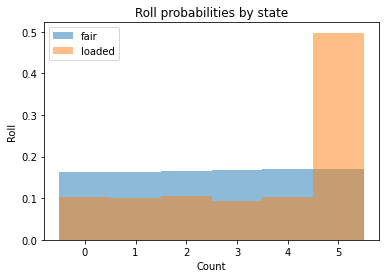

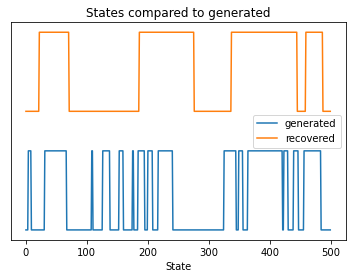

In [25]:
"""
Dishonest Casino Example
------------------------
We'll use the ubiquitous dishonest casino example to demonstrate
how to train a Hidden Markov Model (HMM) on somewhat realistic
test data (e.g. http://www.mcb111.org/w06/durbin_book.pdf
Chapter 3).
In this example, we suspect that a casino is trading out a fair
die (singular or dice) for a loaded die. We want to figure out
1) when the loaded die was used (i.e. the most likely path) 2) how
often the loaded die is used (i.e. the transition probabilities) and
3) the probabilities for each outcome of a roll for the loaded die
(i.e. the emission probabilities).
"""

# %%
# First, import necessary modules and functions.

import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

# %%
# Now, let's act as the casino and exchange a fair die for a loaded one
# and generate a series of rolls that someone at the casino would
# observe.

# make our generative model with two components, a fair die and a
# loaded die
gen_model = hmm.MultinomialHMM(n_components=2, random_state=99)

# the first state is the fair die so let's start there so no one
# catches on rigth away
gen_model.startprob_ = np.array([1.0, 0.0])

# now let's say that we sneak the loaded die in:
# here, we have a 95% chance to continue using the fair die and a 5%
# chance to switch to the loaded die
# when we enter the loaded die state, we have a 90% chance of staying
# in that state and a 10% chance of leaving
gen_model.transmat_ = np.array([[0.95, 0.05],
                                [0.1, 0.9]])

# now let's set the emission means:
# the first state is a fair die with equal probabilities and the
# second is loaded by being biased toward rolling a six
gen_model.emissionprob_ = \
    np.array([[1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6],
              [1 / 10, 1 / 10, 1 / 10, 1 / 10, 1 / 10, 1 / 2]])

# simulate the loaded dice rolls
rolls, gen_states = gen_model.sample(30000)

# plot states over time, let's just look at the first rolls for clarity
fig, ax = plt.subplots()
ax.plot(gen_states[:500])
ax.set_title('States over time')
ax.set_xlabel('Time (# of rolls)')
ax.set_ylabel('State')
fig.show()

# plot rolls for the fair and loaded states
fig, ax = plt.subplots()
ax.hist(rolls[gen_states == 0], label='fair', alpha=0.5,
        bins=np.arange(7) - 0.5, density=True)
ax.hist(rolls[gen_states == 1], label='loaded', alpha=0.5,
        bins=np.arange(7) - 0.5, density=True)
ax.set_title('Roll probabilities by state')
ax.set_xlabel('Count')
ax.set_ylabel('Roll')
ax.legend()
fig.show()

# %%
# Now, let's see if we can recover our hidden states, transmission matrix
# and emission probabilities.

# split our data into training and validation sets (50/50 split)
X_train = rolls[:rolls.shape[0] // 2]
X_validate = rolls[rolls.shape[0] // 2:]

# check optimal score
gen_score = gen_model.score(X_validate)

best_score = best_model = None
n_fits = 50
np.random.seed(13)
for idx in range(n_fits):
    model = hmm.MultinomialHMM(
        n_components=2, random_state=idx,
        init_params='se')  # don't init transition, set it below
    # we need to initialize with random transition matrix probabilities
    # because the default is an even likelihood transition
    # we know transitions are rare (otherwise the casino would get caught!)
    # so let's have an uniform random prior distribution on our transitions
    # between 0 and 0.25 to train our model faster (than uniform random 0 to 1)
    fair_to_loaded = np.random.random() / 4
    loaded_to_fair = np.random.random() / 4
    model.transmat_ = np.array([[1 - fair_to_loaded, fair_to_loaded],
                                [loaded_to_fair, 1 - loaded_to_fair]])
    model.fit(X_train)
    score = model.score(X_validate)
    print(f'Model #{idx}\tScore: {score}')
    idx += 1
    if best_score is None or score > best_score:
        best_model = model
        best_score = score

print(f'Generated score: {gen_score}\nBest score:      {best_score}')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = best_model.predict(rolls)

# plot our recovered states compared to generated (aim 1)
fig, ax = plt.subplots()
ax.plot(gen_states[:500], label='generated')
ax.plot(states[:500] + 1.5, label='recovered')
ax.set_yticks([])
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# rolls)')
ax.set_xlabel('State')
ax.legend()
fig.show()

# %%
# Let's check our learned transition probabilities and see if they match.

print(f'Transmission Matrix Generated:\n{gen_model.transmat_.round(3)}\n\n'
      f'Transmission Matrix Recovered:\n{best_model.transmat_.round(3)}\n\n')

# %%
# Finally, let's see if we can tell how the die is loaded.

print(f'Emission Matrix Generated:\n{gen_model.emissionprob_.round(3)}\n\n'
      f'Emission Matrix Recovered:\n{best_model.emissionprob_.round(3)}\n\n')

# %%
# In this case, we were able to get very good estimates of the transition and
# emission matrices, but decoding the states was imperfect. That's because
# the decoding algorithm is greedy and picks the most likely series of states
# which isn't necessarily what happens in real life. Even so, our model could
# tell us when to watch for the loaded die and we'd have a better chance at
# catching them red-handed.